In [5]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

from precision_recall_cutoff import precision_recall_cutoff

#defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'rachaeld-data445'
bucket = s3.Bucket(bucket_name)

#defining the csv file
file_key = 'turnover.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
## Changing sales and salary to dummies
turnover = pd.concat([turnover.drop(columns = ['sales', 'salary'], axis = 1), pd.get_dummies(turnover[['sales', 'salary']])], axis = 1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.477\nsamples = 3347\nvalue = [1315, 2032]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.209\nsamples = 1402\nvalue = [166, 1236]'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 1300\nvalue = [69, 1231]'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 102\nvalue = [97, 5]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.484\nsamples = 1945\nvalue = [1149, 796]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 706\nvalue = [0, 706]'),
 Text(0.4375, 0.125, 'gini = 0.135\nsamples = 1239\nvalue = [1149, 90]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.173\nsamples = 8652\nvalue = [7827, 825]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7063\nvalue = [6958, 105]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7054\nvalue = [6958, 96]'),
 Text(0.6875, 0.125, 'gini = 0.

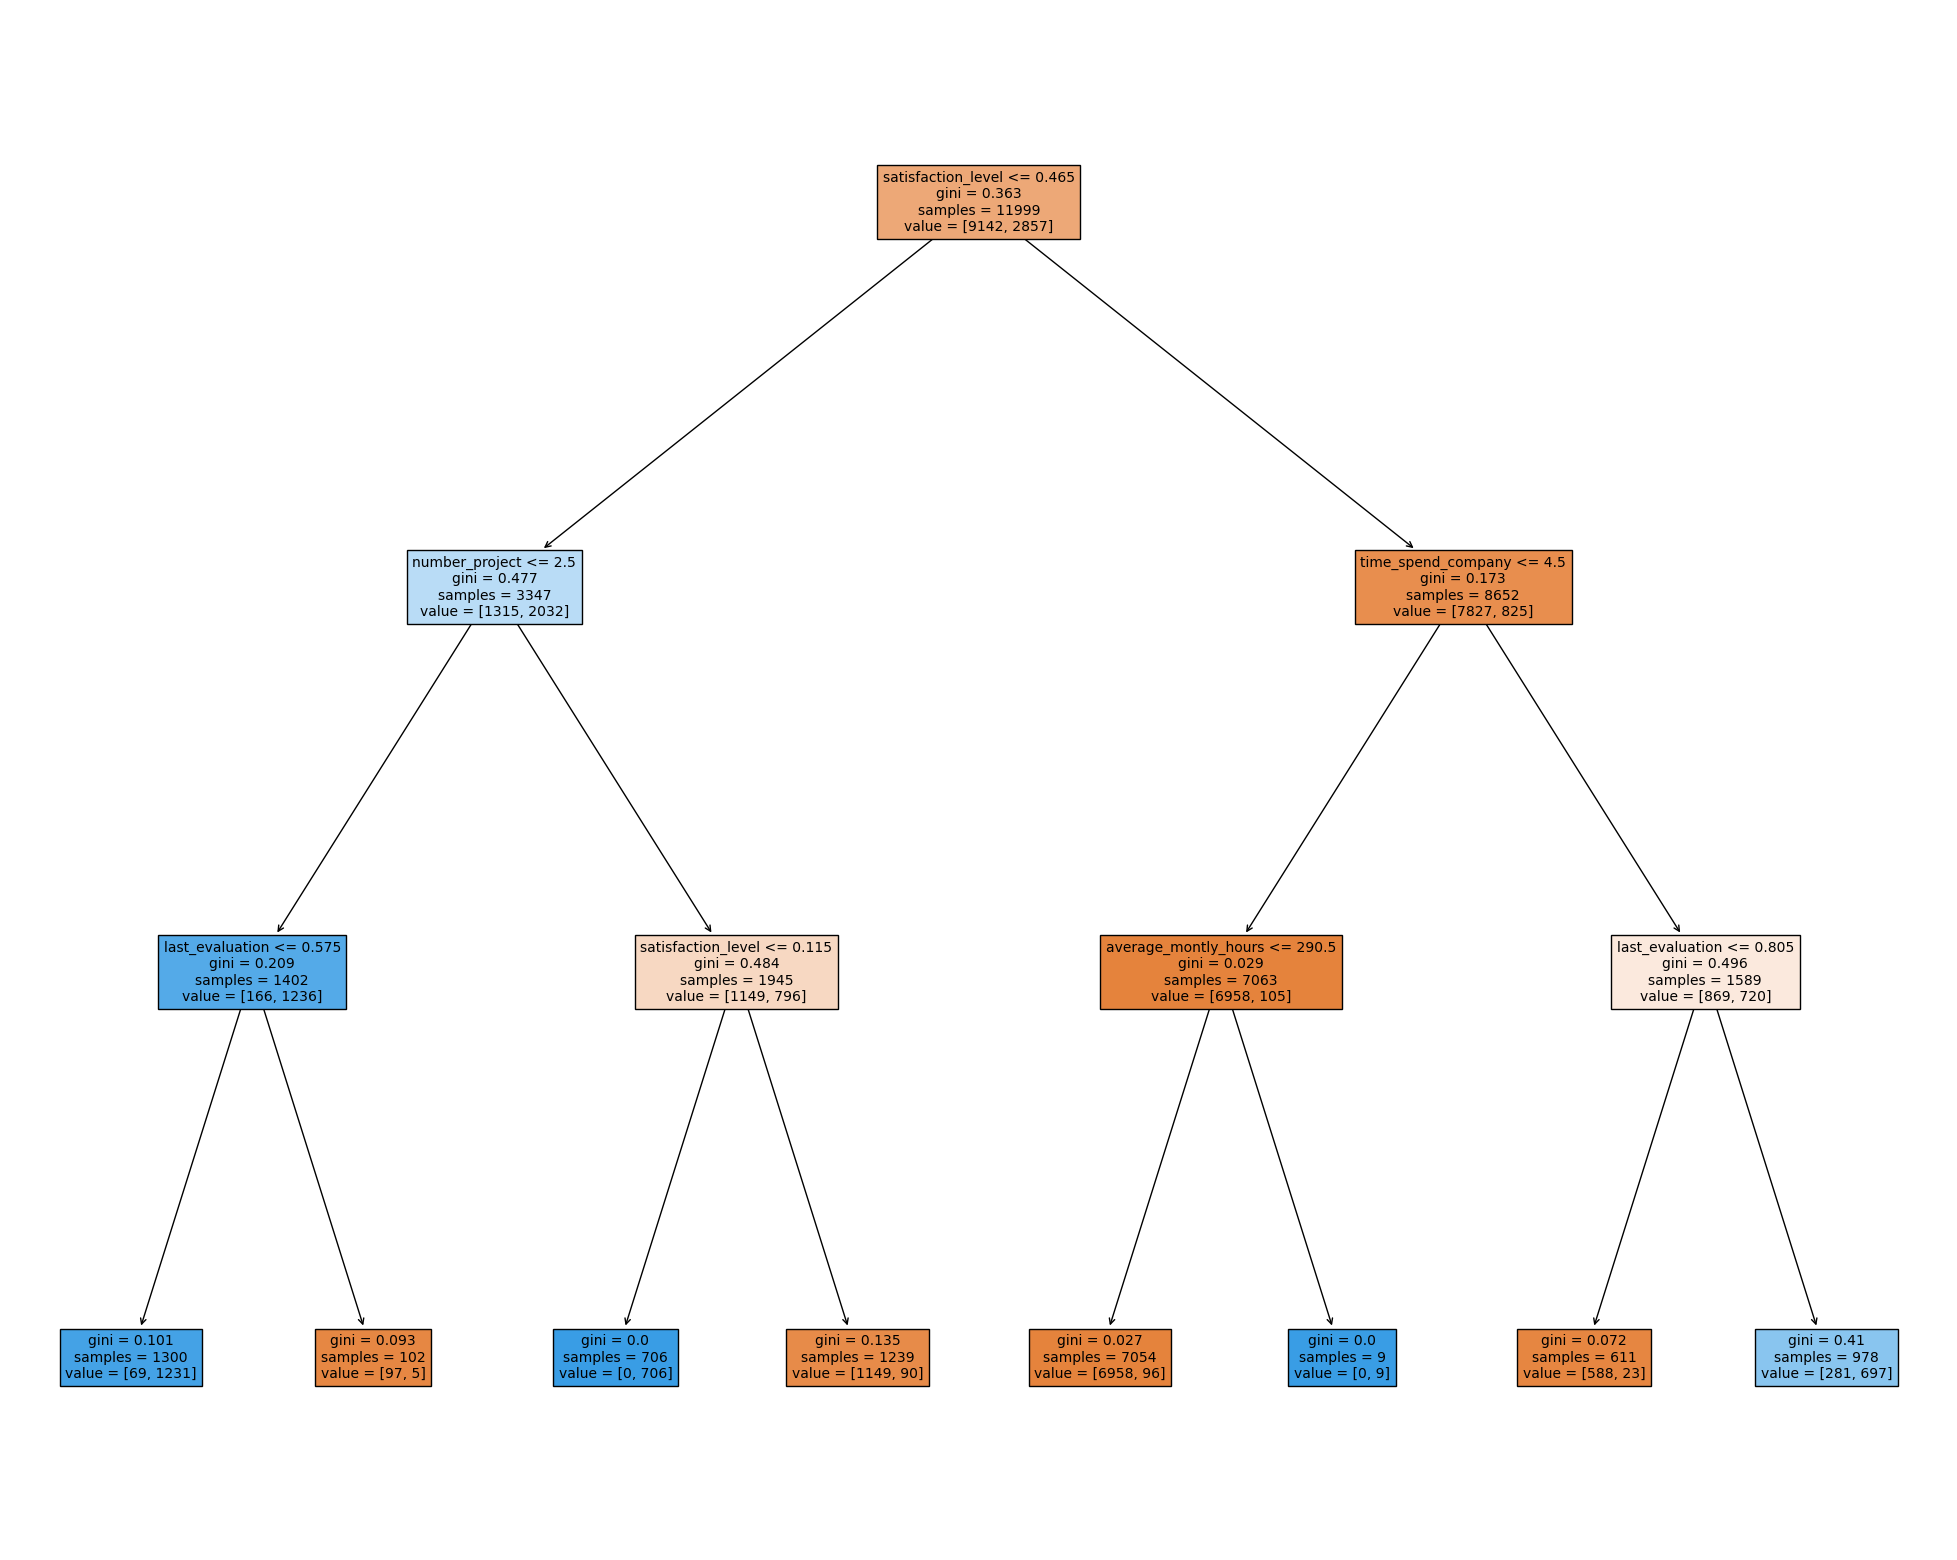

In [8]:
## defining the input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

##splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

##building decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

##for the value the left number is the number of 0s in that leaf, the right number is the number of 1s in the leaf. 

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.48\nsamples = 3350\nvalue = [1336, 2014]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.211\nsamples = 1396\nvalue = [167, 1229]'),
 Text(0.0625, 0.125, 'gini = 0.106\nsamples = 1294\nvalue = [73, 1221]'),
 Text(0.1875, 0.125, 'gini = 0.145\nsamples = 102\nvalue = [94, 8]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.481\nsamples = 1954\nvalue = [1169, 785]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 698\nvalue = [0, 698]'),
 Text(0.4375, 0.125, 'gini = 0.129\nsamples = 1256\nvalue = [1169, 87]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.176\nsamples = 8649\nvalue = [7806, 843]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.028\nsamples = 7052\nvalue = [6953, 99]'),
 Text(0.5625, 0.125, 'gini = 0.026\nsamples = 7045\nvalue = [6953, 92]'),
 Text(0.6875, 0.125, 'gini = 0.0\

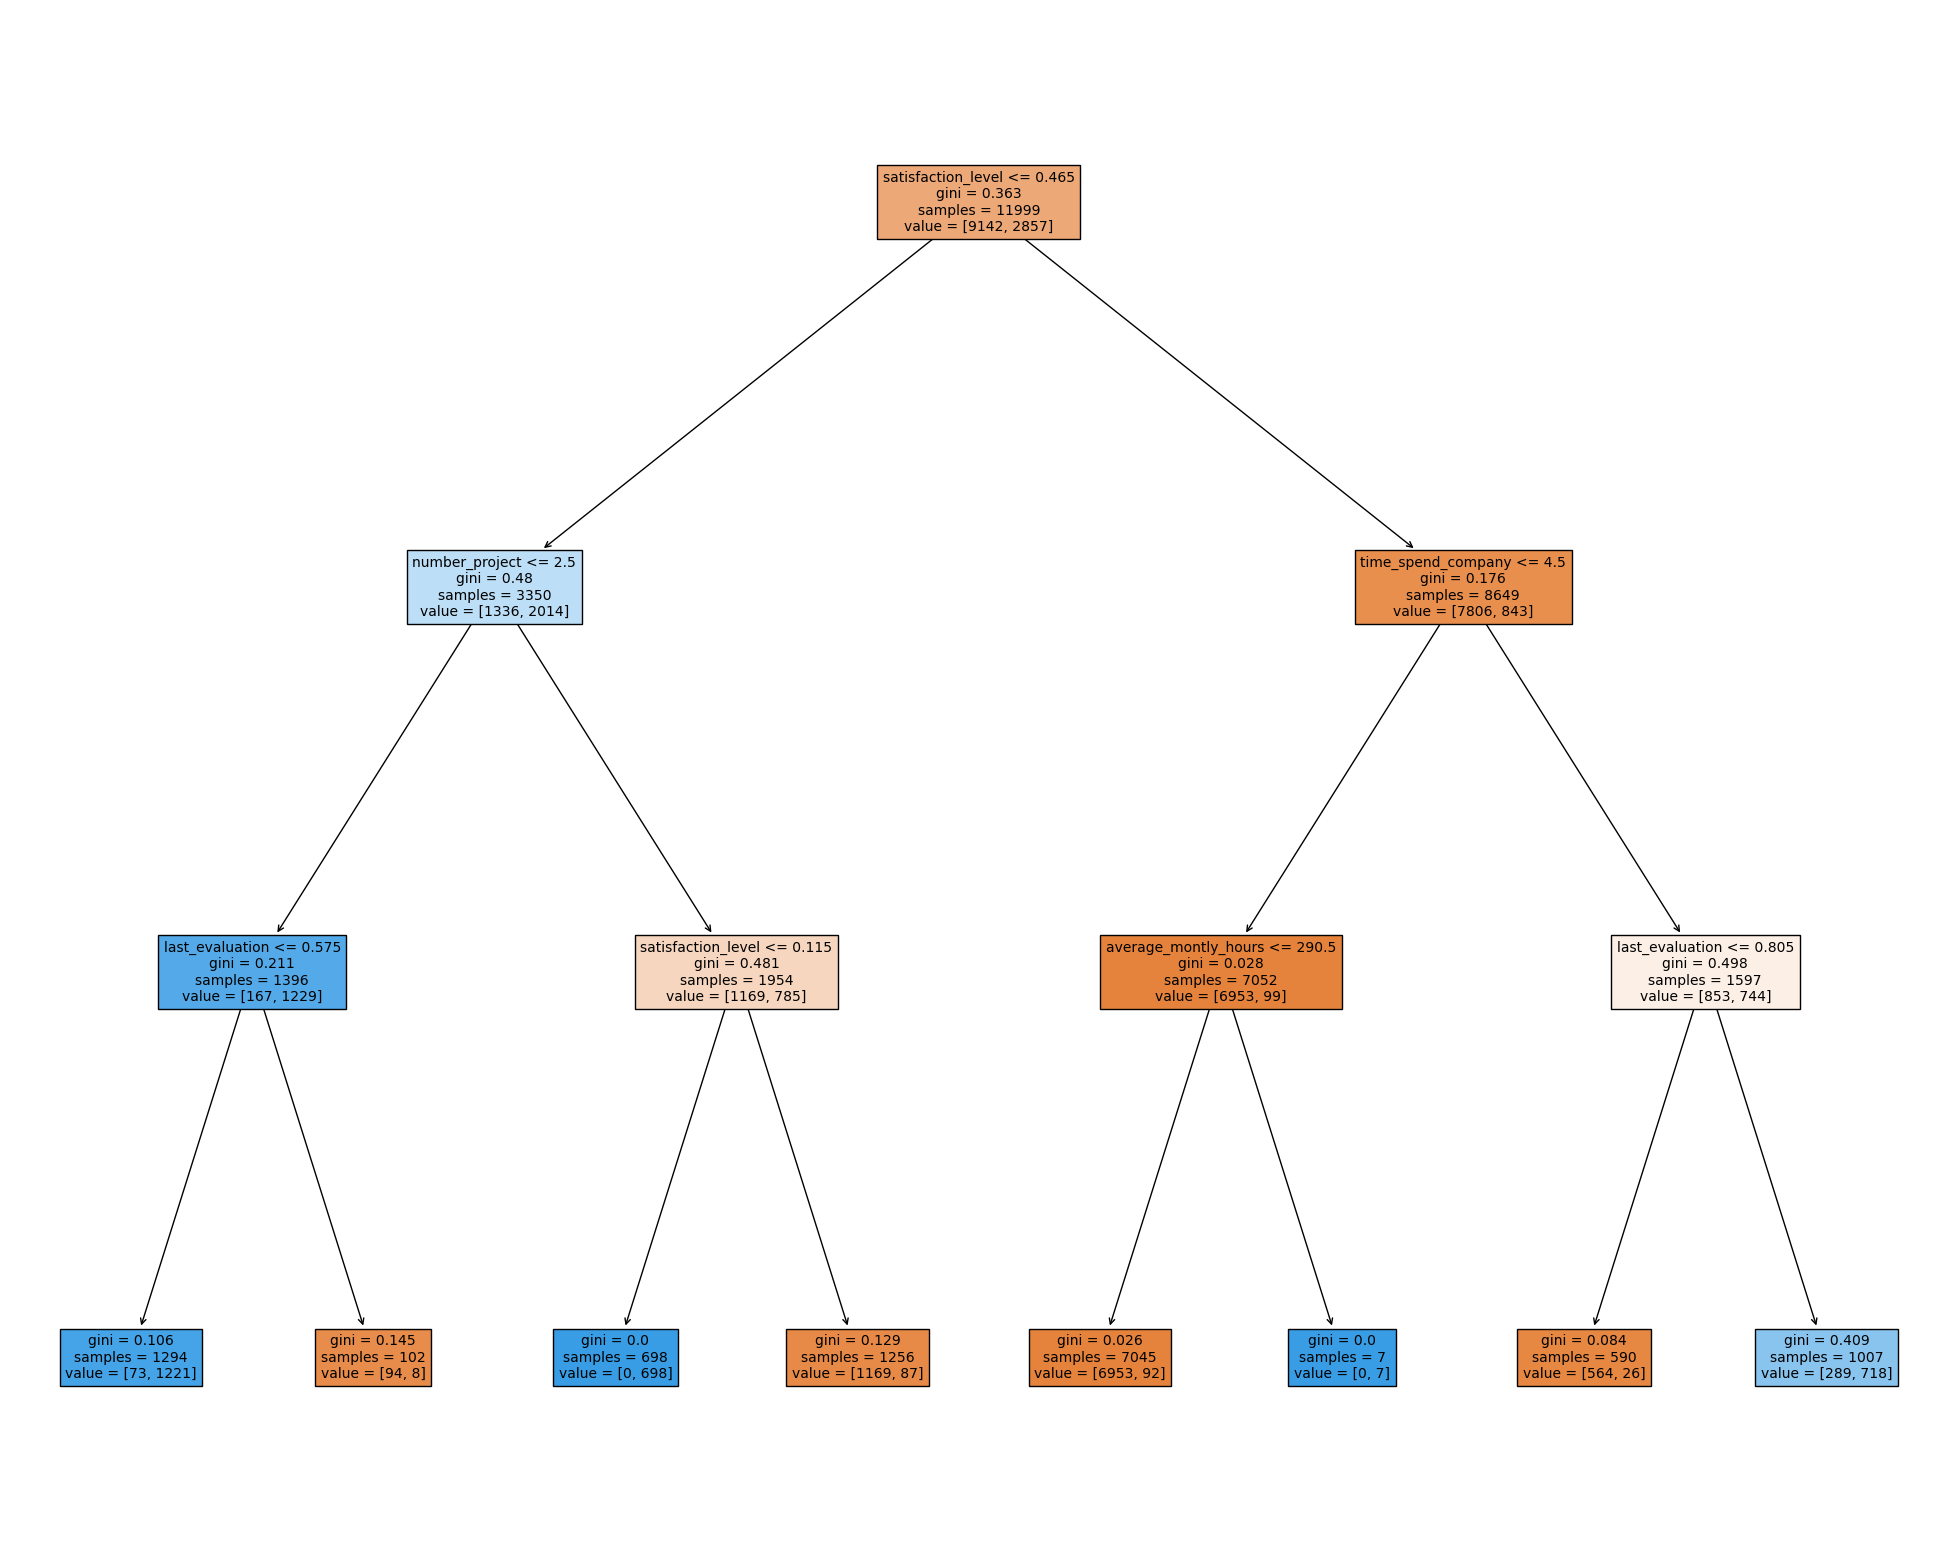

In [9]:
## defining the input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

##splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

##building decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.476\nsamples = 3322\nvalue = [1299, 2023]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.21\nsamples = 1379\nvalue = [164, 1215]'),
 Text(0.0625, 0.125, 'gini = 0.1\nsamples = 1275\nvalue = [67, 1208]'),
 Text(0.1875, 0.125, 'gini = 0.126\nsamples = 104\nvalue = [97, 7]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.486\nsamples = 1943\nvalue = [1135, 808]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 712\nvalue = [0, 712]'),
 Text(0.4375, 0.125, 'gini = 0.144\nsamples = 1231\nvalue = [1135, 96]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.174\nsamples = 8677\nvalue = [7843, 834]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.027\nsamples = 7068\nvalue = [6970, 98]'),
 Text(0.5625, 0.125, 'gini = 0.026\nsamples = 7063\nvalue = [6970, 93]'),
 Text(0.6875, 0.125, 'gini = 0.0\ns

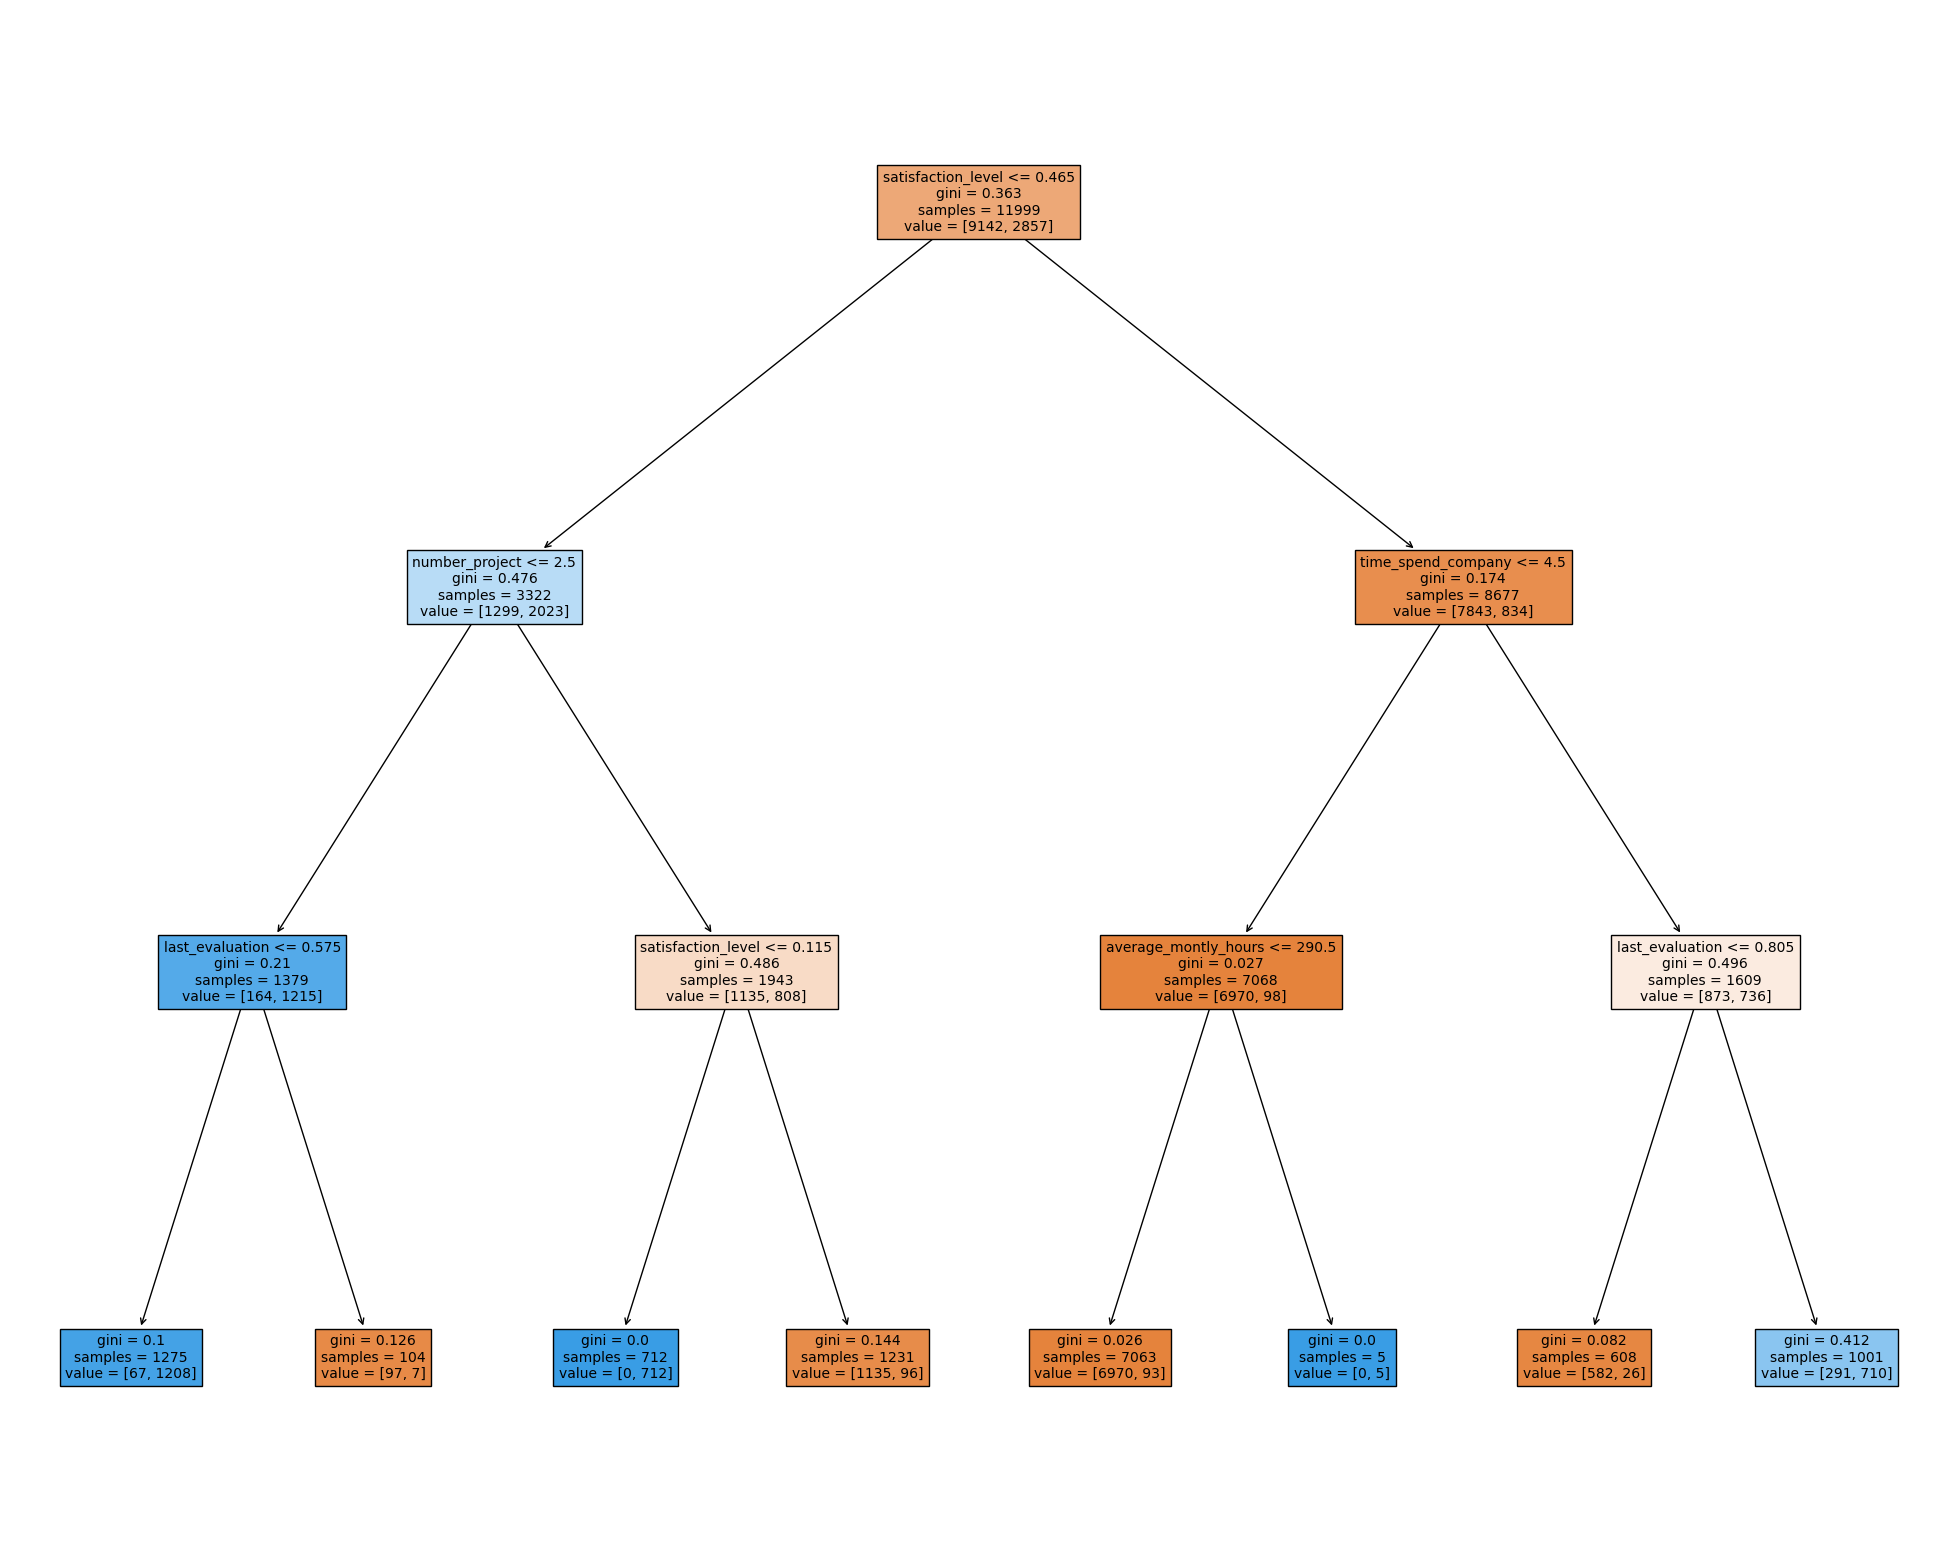

In [10]:
## defining the input and target variables
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

##splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

##building decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

In [12]:
##engineering features for the decision tree model
turnover['interaction_1'] = np.where(((turnover['satisfaction_level'] >= .115) & 
                                     (turnover['satisfaction_level'] <= .465) & 
                                     (turnover['number_project'] > 2.5)), 1, 0)

turnover['interaction_2'] = np.where(((turnover['satisfaction_level'] <= .465) & 
                                     (turnover['number_project'] <= 2.5) & 
                                     (turnover['last_evaluation'] <= .575)), 1, 0)

turnover['interaction_3'] = np.where(((turnover['satisfaction_level'] > .465) & 
                                     (turnover['time_spend_company'] <= 4.5) & 
                                     (turnover['average_montly_hours'] <= 290.5)), 1, 0)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction_3
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
